# Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline

import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

ytrain_pred = rf_model.predict_proba(X_train)

print('RF train roc-auc : {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = rf_model.predict_proba(X_test)

print('RF test roc-auc : {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc : 1.0
RF test roc-auc : 0.9808388888888889


## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

ytrain_pred = log_model.predict_proba(X_train)

print('Logistic train roc-auc : {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = log_model.predict_proba(X_test)

print('Logistic test roc-auc : {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc : 0.9863568922694498
Logistic test roc-auc : 0.9885777777777777


## Ada-Boost Classifier

In [9]:
from sklearn.ensemble import AdaBoostClassifier

ada_classfier=AdaBoostClassifier()
ada_classfier.fit(X_train,y_train)

ytrain_pred=ada_classfier.predict_proba(X_train)
print("Adaboost train roc-auc : {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))

ytest_pred=ada_classfier.predict_proba(X_test)
print("Adaboost test roc-auc : {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

Adaboost train roc-auc : 0.9975081174960356
Adaboost test roc-auc : 0.9826111111111111


## KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

ytrain_pred=knn.predict_proba(X_train)
print("Adaboost train roc-auc : {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))

ytest_pred=knn.predict_proba(X_test)
print("Adaboost test roc-auc : {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

Adaboost train roc-auc : 0.981670071491109
Adaboost test roc-auc : 0.9426111111111111


## Finding the best threshold for maximum accuracy

In [11]:
pred=[]

for model in [rf_model,log_model,ada_classfier,knn]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))

final_prediction=pd.concat(pred,axis=1).mean(axis=1)

print("Ensemble test roc-auc : {}".format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc : 0.9847555555555556


In [12]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,1.00,0.966929,0.538202,0.8
3,0.93,0.761539,0.509875,0.8
4,0.63,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [13]:
final_prediction

0      0.885262
1      0.120823
2      0.826283
3      0.750353
4      0.574947
         ...   
595    0.123840
596    0.117845
597    0.874197
598    0.165717
599    0.834857
Length: 600, dtype: float64

In [14]:
## Calculate the ROC curve

fpr,tpr,thresholds=roc_curve(y_test,final_prediction)

thresholds

array([1.91373256, 0.91373256, 0.90938114, 0.90827475, 0.81180157,
       0.81162833, 0.80056516, 0.8005558 , 0.78627646, 0.78321156,
       0.77909273, 0.77787124, 0.72460041, 0.72387362, 0.70294088,
       0.69643711, 0.65942282, 0.65493537, 0.60529968, 0.59675354,
       0.59212652, 0.59050386, 0.57906376, 0.57736186, 0.55855932,
       0.55639283, 0.54365858, 0.50366892, 0.4246034 , 0.39936151,
       0.39129719, 0.34611558, 0.34086612, 0.23599466, 0.23140421,
       0.22848126, 0.22646893, 0.20539681, 0.20348417, 0.12301207,
       0.1228351 , 0.10548439])

In [15]:
from sklearn.metrics import accuracy_score

acc_ls=[]

for thres in thresholds:
    y_pred=np.where(final_prediction>thres,1,0)
    acc_ls.append(accuracy_score(y_test,y_pred,normalize=True))
    
acc_ls=pd.concat([pd.Series(thresholds),pd.Series(acc_ls)],axis=1)

acc_ls.columns=['thresholds','accuracy']

acc_ls.sort_values(by='accuracy',ascending=False,inplace=True)

acc_ls.head()

,thresholds,accuracy
28,0.424603,0.961667
26,0.543659,0.960000
25,0.556393,0.960000
27,0.503669,0.958333
24,0.558559,0.958333


In [16]:
acc_ls

,thresholds,accuracy
28,0.424603,0.961667
26,0.543659,0.960000
25,0.556393,0.960000
27,0.503669,0.958333
24,0.558559,0.958333
29,0.399362,0.951667
30,0.391297,0.950000
23,0.577362,0.950000
22,0.579064,0.948333
21,0.590504,0.945000


In [17]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='red',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    
    plt.legend()
    plt.show()

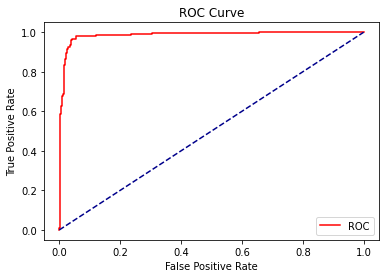

In [18]:
plot_roc_curve(fpr,tpr)